In [13]:
import json
star = []
review = []
with open('train.txt', 'r') as fp:
    line = fp.readline()
    while line:
        star.append(line[0])
        review.append(line[2:])
        line = fp.readline()
data = {
    'star': star,
    'review': review
}

df = pd.DataFrame.from_dict(data)
df.to_csv('train.csv', header=False)




In [14]:
from collections import Counter

In [15]:
num_star = Counter(star)

In [16]:
num_star

Counter({'5': 275, '4': 119, '3': 61, '1': 31, '2': 14})

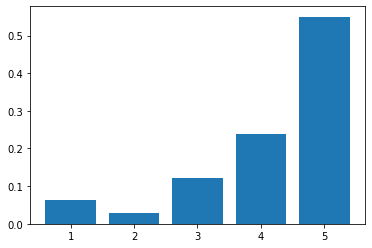

In [18]:
from matplotlib import pyplot as plt
Xs = sorted(list(num_star.keys()))
Ys = [num_star[key]/len(star) for key in Xs]
plt.bar(Xs, Ys)
plt.show()

In [30]:
def balance_classes(xs, ys):
    freqs = Counter(ys)
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [31]:
ys = Counter(star)
print(ys)
balanced_x, balanced_y = balance_classes(review, star)
print(Counter(balanced_y))

Counter({'5': 275, '4': 119, '3': 61, '1': 31, '2': 14})
Counter({'5': 14, '4': 14, '3': 14, '1': 14, '2': 14})


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.now()
vectors = vectorizer.fit_transform(balanced_x)

In [35]:
vectors


<70x1018 sparse matrix of type '<class 'numpy.float64'>'
	with 1645 stored elements in Compressed Sparse Row format>

In [36]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

In [37]:
X_train

<46x1018 sparse matrix of type '<class 'numpy.float64'>'
	with 1189 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:00:00.010537


In [39]:
preds = classifier.predict(X_test)
print(list(preds[:4]))
print(y_test[:4])

['3', '3', '3', '4']
['4', '5', '3', '5']


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))


0.2916666666666667
